# Assignment 2 - DS4Biz Y63
## TextScraping_Classification
***

### Team Detail
**Team Name**: Lnwza7377  
***
### *Student 1*
**Student ID**: 61070273   
**Student Full Name**: กนกกาญจน์ เหล่าประเสริฐศรี
***
### *Student 2*
**Student ID**: 61070277   
**Student Full Name**: กิตติธรรม ผดุงเวียง

In [1]:
import numpy as np #เกี่ยวกับตัวเลข ใช้แปลงค่า null
import pandas as pd #ใช้เกี่ยวกับ dataframe เป็นส่วนใหญ่
import seaborn as sns #ใช้ plot กราฟ
import requests #ใช้เรียก response จาก web
from bs4 import BeautifulSoup # scape ข้อมูลมาจาก web
from sklearn.metrics import confusion_matrix #ใช้สร้าง confution matrix
from sklearn.model_selection import cross_val_score #ใช้ในการ cross validation ค่า accuracy ในโมเดล KNN
import sklearn.neighbors as nei #เป็นส่วนของโมดูล KNN โดยตั้งชื่อสำหรับเรียกโมดูลสั้นๆว่า nei
import matplotlib.pyplot as plt #ใช้ plot กราฟ
from sklearn import metrics #ใช้เกี่ยวกับค่า matrics ต่าง
from sklearn.metrics import accuracy_score, confusion_matrix #ใช้คำนวณ ค่า accuracy และค่า confution matrix 
from sklearn.naive_bayes import MultinomialNB #สำหรับเรียกใช้โมดูล ในโมเดลของ Naive Bayes
import sklearn.model_selection as mod #ใช้สำหรับเลือกโมดูล
from sklearn.neighbors import KNeighborsClassifier #ใช้เรียกโมดูลสำหรับโมเดล KNN
from sklearn.model_selection import train_test_split #ใช้สหรับสร้าง ข้อมูลสำหรับ train และ ข้อมูลสำหรับ test
from sklearn.linear_model import LogisticRegression #ใช้สำหรับเรียกโมดูล ของโมเดล Logistic Regression
import operator #โมดูลสำหรับ set ค่าการ sort
from sklearn.feature_extraction.text import TfidfVectorizer #ใช้สำหรับ weight tokens
from sklearn.feature_extraction import text #ใช้หาคำหยุดในภาษาอังกฤษ
from sklearn.feature_extraction.text import CountVectorizer #ใข้สำหรับตัดคำเพื่อทำ tokens

# Part 1: Data Collection

### เก็บ link ข่าวทั้ง 12 เดือน

In [2]:
#เก็บลิ้งข่าวทั้ง 12 เดือนมาไว้ใน list
m_list = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
link_m = []
for month in m_list:
    mlink=(f'http://www.it.kmitl.ac.th/~teerapong/news_archive/month-{month}-2017.html')
    link_m.append(mlink)
link_m

['http://www.it.kmitl.ac.th/~teerapong/news_archive/month-jan-2017.html',
 'http://www.it.kmitl.ac.th/~teerapong/news_archive/month-feb-2017.html',
 'http://www.it.kmitl.ac.th/~teerapong/news_archive/month-mar-2017.html',
 'http://www.it.kmitl.ac.th/~teerapong/news_archive/month-apr-2017.html',
 'http://www.it.kmitl.ac.th/~teerapong/news_archive/month-may-2017.html',
 'http://www.it.kmitl.ac.th/~teerapong/news_archive/month-jun-2017.html',
 'http://www.it.kmitl.ac.th/~teerapong/news_archive/month-jul-2017.html',
 'http://www.it.kmitl.ac.th/~teerapong/news_archive/month-aug-2017.html',
 'http://www.it.kmitl.ac.th/~teerapong/news_archive/month-sep-2017.html',
 'http://www.it.kmitl.ac.th/~teerapong/news_archive/month-oct-2017.html',
 'http://www.it.kmitl.ac.th/~teerapong/news_archive/month-nov-2017.html',
 'http://www.it.kmitl.ac.th/~teerapong/news_archive/month-dec-2017.html']

### เก็บ link ข่าวของแต่ละข่าวในแต่ละเดือน

In [3]:
#สร้างฟังก์ชั่นสำหรับเก็บลิ้งค์ข่าวแต่ละข่าวในแต่ละเดือน
def get_mlink(n_month,in_mount):
    page_name = []
    response = requests.get(link_m[in_mount])
    html_page = BeautifulSoup(response.content, 'lxml')
    selector = 'td > a'
    # select return เป็น list ของ tag
    tags = html_page.select(selector)
    for txt in tags:
        x = str(txt).split()[1]
        y = str(x).split('href="')[1]
        z = str(y).split('">')[0]
        page_name.append(z)
    #สร้างและเก็บ link ข่าว
    n_month = []
    for new_n in page_name:
        n_link =(f'http://www.it.kmitl.ac.th/~teerapong/news_archive/{new_n}')
        n_month.append(n_link)
    return  n_month


In [4]:
#ใช้ฟังก์ชัน ที่สร้างเก็บ ลิ้งของข่าวแต่ละเดือน
jan_link = get_mlink('Jan',0)
feb_link = get_mlink('Feb',1)
mar_link = get_mlink('Mar',2)
apr_link = get_mlink('Apr',3)
may_link = get_mlink('May',4)
jun_link = get_mlink('Jun',5)
jul_link = get_mlink('Jul',6)
aug_link = get_mlink('Aug',7)
sep_link = get_mlink('Sep',8)
oct_link = get_mlink('Oct',9)
nov_link = get_mlink('Nov',10)
dec_link = get_mlink('Dec',11)

In [5]:
#ฟังชั่นสำหรับแปลง list ให้อยู่ในรูปแบบ string
def listToString(s):  
    # initialize an empty string 
    str1 = ""  
    # traverse in the string   
    for ele in s:  
        str1 += ele   
    # return string   
    return str1  

In [6]:
#สร้างฟังชั้นสำหรับหาเนื้อข่าวแต่ละเดือน โดยการ scrape มา จาก web ข่าวที่กำหนด
def get_news_text(news_link):
    news_txt = []
    for i in range(len(news_link)):
        news_txt2 = []
        url = news_link[i]
        response = requests.get(url)
        html_page = BeautifulSoup(response.content, 'lxml')
        selector = 'p'
        # select return เป็น list ของ tag
        ttags = html_page.select(selector)[1:-1]
        for txt in ttags:
            x = str(txt).split('<p>')[1]
            y = str(x).split('</p>')[0]
            news_txt2.append(str(y))
        full_txt = listToString(news_txt2)
        news_txt.append(full_txt)
    return news_txt

In [7]:
#หาเนื้อหาของข่าวของแต่ละเดือนด้วยฟังชั่นก์ที่สร้างขึ้น
jan_news = get_news_text(jan_link)
feb_news = get_news_text(feb_link)
mar_news = get_news_text(mar_link)
apr_news = get_news_text(apr_link)
may_news = get_news_text(may_link)
jun_news = get_news_text(jun_link)
jul_news = get_news_text(jul_link)
aug_news = get_news_text(aug_link)
sep_news = get_news_text(sep_link)
oct_news = get_news_text(oct_link)
nov_news = get_news_text(nov_link)
dec_news = get_news_text(dec_link)

In [8]:
#สร้างฟังชั่นก์ สำหรับหาชื่อข่าวของแต่ละเดือน โดยการ scrape มา จาก web ข่าวที่กำหนด
def get_acTitle(m_title,in_mount):
    m_title = []
    response = requests.get(link_m[in_mount])
    html_page = BeautifulSoup(response.content, 'lxml')
    selector = 'td > a'
    # select return เป็น list ของ tag
    tags = html_page.select(selector)
    for txt in tags:
        x = str(txt).split('>')[1]
        y = str(x).split('<')[0]
        m_title.append(y)
    return  m_title

In [9]:
#หารายชื่อของข่าวของแต่ละเดือนด้วยฟังชั่นก์ที่สร้างขึ้น
jan_title = get_acTitle('Jan',0)
feb_title = get_acTitle('Feb',1)
mar_title = get_acTitle('Mar',2)
apr_title = get_acTitle('Apr',3)
may_title = get_acTitle('May',4)
jun_title = get_acTitle('Jun',5)
jul_title = get_acTitle('Jul',6)
aug_title = get_acTitle('Aug',7)
sep_title = get_acTitle('Sep',8)
oct_title = get_acTitle('Oct',9)
nov_title = get_acTitle('Nov',10)
dec_title = get_acTitle('Dec',11)

In [10]:
pd.set_option('display.max_colwidth',-1) #ตั้งค่าให้ dataframe แสดงเนื้อหาในคอลลัมน์ทั้งหมด

In [11]:
#สร้าง dataframe สำหรับเก็บข่าวของแต่ละเดือน โดยรวม ชื่อข่าวและเนื้อหาข่าวเข้าด้วยกัน
jan_df = pd.DataFrame(list(zip(jan_title, jan_news)), columns =['Article Title', 'News'])
feb_df = pd.DataFrame(list(zip(feb_title, feb_news)), columns =['Article Title', 'News'])
mar_df = pd.DataFrame(list(zip(mar_title, mar_news)), columns =['Article Title', 'News'])
apr_df = pd.DataFrame(list(zip(apr_title, apr_news)), columns =['Article Title', 'News'])
may_df = pd.DataFrame(list(zip(may_title, may_news)), columns =['Article Title', 'News'])
jun_df = pd.DataFrame(list(zip(jun_title, jun_news)), columns =['Article Title', 'News'])
jul_df = pd.DataFrame(list(zip(jul_title, jul_news)), columns =['Article Title', 'News'])
aug_df = pd.DataFrame(list(zip(aug_title, aug_news)), columns =['Article Title', 'News'])
sep_df = pd.DataFrame(list(zip(sep_title, sep_news)), columns =['Article Title', 'News'])
oct_df = pd.DataFrame(list(zip(oct_title, oct_news)), columns =['Article Title', 'News'])
nov_df = pd.DataFrame(list(zip(nov_title, nov_news)), columns =['Article Title', 'News'])
dec_df = pd.DataFrame(list(zip(dec_title, dec_news)), columns =['Article Title', 'News'])

In [12]:
#นำเนื้อหาข่าวแต่ละเดือนมาต่อกัน
all_result=pd.concat([jan_df, feb_df,mar_df,apr_df,may_df,jun_df,jul_df,aug_df,sep_df,oct_df,nov_df,dec_df], ignore_index=True)

In [13]:
all_result['ID'] = range(1, len(all_result) + 1) #ตั้งค่า ID ให้เริ่มจาก 1

In [14]:
all_result = all_result.set_index('ID') #set ค่า ID ให้เป็น index

In [15]:
all_result #เนื้อหาข่าวทั้งหมด

Article Title  \
ID                                                                                                
1     21st-Century Sports: How Digital Technology Is Changing the Face Of The Sporting Industry   
2     Asian quake hits European shares                                                            
3     BT offers free net phone calls                                                              
4     Barclays shares up on merger talk                                                           
5     Barkley fit for match in Ireland                                                            
6     Bellamy under new fire                                                                      
7     Benitez 'to launch Morientes bid'                                                           
8     Benitez delight after crucial win                                                           
9     Big war games battle it out                                                                 
10    British Library gets wireless net                                                           
11    Brizzel to run AAA's in Sheffield                                                           
12    Bush budget seeks deep cutbacks                                                             
13    Bush to get 'tough' on deficit                                                              
14    Cable offers video-on-demand                                                                
15    Cabs collect mountain of mobiles                                                            
16    Camera phones are 'must-haves'                                                              
17    Card fraudsters 'targeting web'                                                             
18    Cash gives way to flexible friend                                                           
19    Cebit opens to mobile music tune                                                            
20    Charvis set to lose fitness bid                                                             
21    Chelsea hold Arsenal                                                                        
22    Christmas sales worst since 1981                                                            
23    Clijsters set for February return                                                           
24    Clyde 0-5 Celtic                                                                            
25    Coach Ranieri sacked by Valencia                                                            
26    Confusion over high-definition TV                                                           
27    Cuba winds back economic clock                                                              
28    DS aims to touch gamers                                                                     
29    Dawson set for new Wasps contract                                                           
30    Diageo to buy US wine firm                                                                  
...                                 ...                                                           
1379  Sony PSP tipped as a 'must-have'                                                            
1380  Stevens named in England line-up                                                            
1381  T-Mobile bets on 'pocket office'                                                            
1382  Takeover offer for Sunderland FC                                                            
1383  The future in your pocket                                                                   
1384  The gloves are off                                                                          
1385  Tigers wary of Farrell 'gamble'                                                             
1386  Troubled Marsh under SEC scrutiny                                                           
1387  UK gets official 

In [16]:
all_result.to_csv('datastore\All_text_of_news.csv', index = True) #save เนื้อหาข่าวเป็นไฟล์ csv

In [17]:
#save เนื้อหาข่าวเป็น ไฟล์ text โดยใช้รหัส encoding = utf-8
np.savetxt(r'datastore\All_text_of_news.txt', all_result.values, fmt="%s", delimiter=":",encoding='utf-8')

In [18]:
#หาประเภทข่าวจากการ scraping มาจาก web
c_tag = []
for n_link in link_m:
    response = requests.get(n_link)
    html_page = BeautifulSoup(response.content, 'lxml')
    selector = 'td.category'
    # select return เป็น list ของ tag
    tags = html_page.select(selector)
    for cate in tags:
        x = str(cate).split('>')[1]
        y = str(x).split('<')[0]
        z = str(y).split('\xa0')[1]
        c_tag.append(z)

In [19]:
all_cate = pd.DataFrame(c_tag,columns=['Article Category'])
all_cate.head() #แสดง ประเภทข่าว 5 ตัวบนสุด

,Article Category
0,technology
1,business
2,technology
3,business
4,sport


In [20]:
all_cate = all_cate.replace('N/A', np.nan) #แทนที่ประเภทข่าวที่เป็น N/A ด้วยค่า null
all_cate = all_cate.dropna() #ดรอป ประเภทข่าวที่เป็น null

In [21]:
all_cate.tail() #แสดงประเภทข่าว 5 ตัวสุดท้ายจากทั้งหมด

,Article Category
1456,sport
1457,business
1458,business
1459,business
1460,sport


In [22]:
all_cate['ID'] = range(1, len(all_cate) + 1) #ให้ค่า index เริ่มต้นจาก 1 โดยทำเป็นคอลลัมน์ ID

In [23]:
all_cate = all_cate.set_index('ID') #set index เป็นค่า ID

In [24]:
all_cate.head() #ประเภทข่าว 5 ตัว บนสุด

,Article Category
ID,
1,technology
2,business
3,technology
4,business
5,sport


In [25]:
all_news = all_result.join(all_cate,on='ID') #นำประเภทข่าวมา join ตาม ID

In [26]:
all_news.tail() #แสดงข้อมูล 5 ตัวสุดท้ายจากข้อมูลทั้งหมด

,Article Title,News,Article Category
ID,,,
1404,Woodward eyes Brennan for Lions,"Toulouse's former Irish international Trevor Brennan could be one of Clive Woodward's many surprises when the 44-man Lions tour squad is announced.Brennan, who last played for Ireland against Samoa in 2001, is held in high esteem by the former <i>England</i> coach. ""If you speak to the players there's a huge amount of respect for the guy,"" Woodward told the Sunday Independent. ""Players tend to know better than most coaches. It's not just the Irish, but Welsh and English players as well."" The 31-year-old former Dublin milkman moved from Leinster to Toulouse in 2003 and immediately picked up a Heineken Cup winner's medal in an all-French final against Perpignan at Lansdowne Road.Brennan is highly-rated at Stade Toulousain, where he is used anywhere in the back five. Woodward is ensuring his preparations for the trip to New Zealand in June are as thorough as possible. ""I've spoken to quite a few players, and they probably don't know what they're actually saying when we're having these conversations,"" he told the newspaper. ""But you talk about certain players and they'll say if they think they're up to scratch or that they don't want them in their team. ""I haven't heard a bad word said against Trevor, which, considering he has a pretty tough guy reputation, is, to me, impressive.""",sport
1405,WorldCom trial starts in New York,"The trial of Bernie Ebbers, former chief executive of bankrupt US phone company WorldCom, has started in New York with the selection of the jury.Mr Ebbers, 63, is accused of being the mastermind behind an $11bn (£6bn) accounting fraud that eventually saw the firm collapse in July 2002. His indictment includes charges of securities fraud, conspiracy and filing false reports with regulators. If found guilty, Mr Ebbers could face a substantial jail sentence. He has firmly declared his innocence.Under Mr Ebbers' leadership, WorldCom emerged from Mississippi obscurity to become a $160bn telecoms giant and the darling of late 1990s investors. Yet as competition intensified and the telecoms boom petered out, WorldCom found itself under growing financial stress. When WorldCom finally collapsed, shareholders lost about $180bn and 20,000 workers lost their jobs. Mr Ebbers' trial, which is expected to last two months, is the latest in a series of attempts by US prosecutors to pursue senior executives for fraud. It will coincide with the retrial of former Tyco International chief Dennis Kozlowski and his top lieutenant, accused of looting the industrial conglomerate to the tune of $600m. Trail preparations are also preparing for former executives of shamed US energy firm Enron.",business
1406,Yukos accused of lying to court,"Russian oil firm Yukos lied to a US court in an attempt to stop the Russian government selling off its key production unit, the court has heard.The unit, Yugansk, was sold to pay off a $27.5bn (£14.5bn) back tax bill. Yukos argued that since it had a US subsidiary and local bank accounts, the US court could declare it bankrupt and stop the auction of Yugansk. But Deutsche Bank - itself a target of a Yukos lawsuit - said documents had been backdated to strengthen the case.Deutsche Bank's evidence came on the first day of a two-day hearing in Houston. Its lawyer, Hugh Ray, told the court that Yukos had claimed it had transferred $27m into two Texas bank accounts opened by its new US subsidiary. By doing so, he said, the firm had intended to reinforce its US presence - and thus its chances of getting its case heard in US courts. But he said that the papers documenting the transaction were not drawn up till weeks after Yukos made its bankruptcy application on 14 December, and then backdated.Yukos chief financial officer Bruce Misamore, who had moved to the US in early December to set up Yukos USA, acknowledged the point. He said the discrepancy was only in the paperwork, but that money had indeed been transferred o

In [27]:
#ฟังชั่นสำหรับหาประเภทข่าว
def unique(list1): 
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set))
    return unique_list

In [28]:
n_cate = unique(c_tag) #ประเภทข่าวทั้งหมด
n_cate

['N/A', 'business', 'sport', 'technology']

In [29]:
cate_df = pd.DataFrame(n_cate,columns=['Article Category']) #สร้าง dataframe ของประเภทข่าว
cate_df = cate_df.replace('N/A', np.nan) #แทนที่ประเภทข่าวที่เป็น N/A ด้วยค่า null
cate_df = cate_df.dropna() #ดรอป ประเภทข่าวที่เป็น null

In [30]:
cate_df #dataframe ของ ประเภทข่าว

,Article Category
1,business
2,sport
3,technology


In [31]:
cate_df.to_csv('target\category.csv', index = True) #save ประเภทข่าวเป็นไฟล์ csv

In [32]:
#save ประเภทข่าวเป็น ไฟล์ text โดยใช้รหัส encoding = utf-8
np.savetxt(r'target\category.txt', cate_df.values, fmt="%s", delimiter=":",encoding='utf-8')

# Part 2: Text Classification 

In [33]:
fin = open("datastore/All_text_of_news.txt","r",encoding='utf-8')
raw_documents = fin.readlines()
fin.close()
print("Read %d raw text documents" % len(raw_documents)) #จำนวนข่าวทั้งหมดที่จะนำมาทำนาย

Read 1408 raw text documents


In [34]:
tar = open("target/category.txt","r",encoding='utf-8')
raw_target = tar.readlines()
tar.close()
print("Read %d raw target" % len(raw_target)) #จำนวนของประเภทที่ต้องการทำนาย

Read 3 raw target


In [35]:
# หาจำนวนคำจาก และ เปลี่ยนเป็น tokens
tokenize = CountVectorizer().build_tokenizer()
# convert to lowercase, then tokenize
tokens1 = tokenize(raw_documents[0].lower())
print(tokens1)

['21st', 'century', 'sports', 'how', 'digital', 'technology', 'is', 'changing', 'the', 'face', 'of', 'the', 'sporting', 'industry', 'the', 'sporting', 'industry', 'has', 'come', 'long', 'way', 'since', 'the', '60s', 'it', 'has', 'carved', 'out', 'for', 'itself', 'niche', 'with', 'its', 'roots', 'so', 'deep', 'that', 'cannot', 'fathom', 'the', 'sports', 'industry', 'showing', 'any', 'sign', 'of', 'decline', 'any', 'time', 'soon', 'or', 'later', 'the', 'reason', 'can', 'be', 'found', 'in', 'this', 'seemingly', 'subtle', 'difference', 'other', 'industries', 'have', 'customers', 'the', 'sporting', 'industry', 'has', 'fans', 'vivek', 'ranadivé', 'leader', 'of', 'the', 'ownership', 'group', 'of', 'the', 'nba', 'sacramento', 'kings', 'explained', 'it', 'beautifully', 'fans', 'will', 'paint', 'their', 'face', 'purple', 'fans', 'will', 'evangelize', 'every', 'other', 'ceo', 'in', 'every', 'business', 'is', 'dying', 'to', 'be', 'in', 'our', 'position', 'they', 're', 'dying', 'to', 'have', 'fans'

In [36]:
#แสดงคำหยุด ใน ภาษา อังกฤษ
stopwords = text.ENGLISH_STOP_WORDS
print(stopwords)

frozenset({'between', 'either', 'empty', 'enough', 'part', 'co', 'along', 'many', 'toward', 'very', 'my', 'thick', 'elsewhere', 'across', 'former', 'has', 'becomes', 'since', 'about', 'is', 'ten', 'while', 'from', 'mill', 'after', 'will', 'at', 'ours', 'otherwise', 'always', 'yet', 'due', 'as', 'two', 'become', 'de', 'for', 'also', 'that', 'am', 'couldnt', 'sincere', 'your', 'together', 'name', 'themselves', 'any', 'whither', 'have', 'interest', 'herein', 'thin', 'fifteen', 'cry', 'hundred', 'con', 're', 'own', 'whenever', 'whatever', 'i', 'our', 'detail', 'done', 'find', 'most', 'seem', 'why', 'been', 'describe', 'the', 'all', 'onto', 'their', 'again', 'un', 'yours', 'now', 'everything', 'thus', 'these', 'indeed', 'mine', 'within', 'yourselves', 'else', 'could', 'see', 'third', 'no', 'on', 'its', 'noone', 'top', 'becoming', 'another', 'beside', 'never', 'put', 'through', 'thru', 'latter', 'off', 'be', 'hereby', 'six', 'wherever', 'with', 'inc', 'amongst', 'beforehand', 'among', 'me', 

In [37]:
all_filtered_tokens = [] # list สำหรับเก็บ tokens
for doc in raw_documents:
    # tokenize document ตัวถัดไป
    tokens = tokenize(doc.lower())
    #  นำ stopwords ออก
    filtered_tokens = []
    for token in tokens:
        if not token in stopwords:
            filtered_tokens.append(token)  
    # เพิ่มทั้งหมดลงไปใน list
    all_filtered_tokens.append( filtered_tokens )
print("Created %d filtered token lists" % len(all_filtered_tokens) ) #จำนวน list ของ token

Created 1408 filtered token lists


In [38]:
counts = {}
# ขั้นตอนการ filtered tokens สำหรับแต่ละ document
for doc_tokens in all_filtered_tokens:
    for token in doc_tokens:
        if token in counts:
            counts[token] += 1
        else:
            counts[token] = 1
print("Found %d unique terms in this corpus" % len(counts)) #มีคำที่ไม่ซ้ำกันกี่ตัว

Found 22751 unique terms in this corpus


In [39]:
sorted_counts = sorted(counts.items(), key=operator.itemgetter(1), reverse=True) # setค่าสำหรับการ sort ข้อมูล

In [40]:
#หาจำนวนคำซ้ำ 20 คำแรก
for i in range(20): 
    term = sorted_counts[i][0]
    count = sorted_counts[i][1]
    print( "%s (count=%d)" % ( term, count )  )

said (count=4119)
year (count=1557)
new (count=1215)
people (count=1203)
mr (count=1092)
world (count=960)
time (count=933)
game (count=881)
news (count=766)
online (count=727)
just (count=683)
market (count=644)
like (count=618)
games (count=608)
company (count=601)
players (count=599)
years (count=598)
make (count=597)
technology (count=576)
firm (count=547)


In [41]:
vectorizer = TfidfVectorizer(stop_words="english",min_df = 3) #set ค่าความยาวคำน้อยสุดคือ 3 ตัวอักษร
X = vectorizer.fit_transform(raw_documents) #weight ข้อมูลจาก raw_document ที่อ่านมาจาก ไฟล์ text
# แสดงบาง sample weighted values
print(X[0])

  (0, 147)	0.10050565160462797
  (0, 1644)	0.093560718200077
  (0, 8273)	0.23083588689178153
  (0, 2700)	0.11974814720918282
  (0, 8759)	0.15347832941705777
  (0, 1675)	0.0862082765851556
  (0, 3387)	0.11726315456463993
  (0, 8272)	0.3593884359382316
  (0, 4594)	0.27978398272363836
  (0, 1912)	0.05000406183529421
  (0, 5331)	0.04884775928523515
  (0, 9537)	0.04156546612225096
  (0, 5965)	0.10612980015978744
  (0, 7551)	0.12042717517925981
  (0, 2487)	0.08676626990990118
  (0, 7976)	0.07727802702484744
  (0, 7996)	0.07506775603111056
  (0, 2479)	0.07979559717922324
  (0, 8920)	0.0346397113045875
  (0, 8165)	0.0686297948473474
  (0, 5105)	0.06191367649414073
  (0, 7098)	0.07727802702484744
  (0, 7804)	0.11432580560311485
  (0, 2688)	0.08183520006877257
  (0, 4593)	0.08676626990990118
  :	:
  (0, 9746)	0.03999546922682853
  (0, 7805)	0.056165228175310604
  (0, 8365)	0.1031005496041702
  (0, 4740)	0.10455199221440067
  (0, 9689)	0.03652539340632335
  (0, 3841)	0.10091483850787746
  (0, 314

In [42]:
Y = all_news['Article Category'] #target ของ การ ทำนาย

In [43]:
test_size = 0.3 #ขนาดของตัว test อยู่ที่ 0.3 หรือ 30%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

In [44]:
print("Training set size is %d" % X_train.shape[0] ) #จำนวนข้อมูลสำหรับการ train
print("Test set size is %d" % X_test.shape[0] ) # จำนวนข้อมูลสำหรับการ test

Training set size is 985
Test set size is 423


# KNN Classifier Model

## หาค่าความแม่นยำค่า k แต่ละค่า

In [45]:
k_range = range(1,41) #กำหนด range ของค่า k ตั้งแต่ 1 ถึง 41
k_scores = [] # list เปล่าสำหรับเก็บค่า accuracy ของ k

In [46]:
for k in k_range: #ทดลองหาค่า accuracy ของ k แต่ละตัว
    knn = nei.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score (knn, X_test, Y_test, cv = 10, scoring = 'accuracy')
    k_scores.append(scores.mean())

In [47]:
k_scores #ค่าความแม่นยำของ k แต่ละตัว

[0.92921926910299,
 0.9387513842746401,
 0.9483942414174973,
 0.9508305647840531,
 0.9554263565891471,
 0.9578073089700997,
 0.9601882613510521,
 0.9578626799557032,
 0.9625138427464008,
 0.9672203765227021,
 0.9648394241417497,
 0.9694905869324474,
 0.9718715393133998,
 0.9741971207087486,
 0.9718715393133998,
 0.9718715393133998,
 0.969545957918051,
 0.9741971207087486,
 0.9718161683277963,
 0.9718161683277963,
 0.9718161683277963,
 0.9718161683277963,
 0.9694352159468439,
 0.9694352159468439,
 0.9694352159468439,
 0.9717607973421927,
 0.9717607973421927,
 0.9718161683277963,
 0.9694352159468439,
 0.9694905869324474,
 0.9718161683277963,
 0.9718161683277963,
 0.9718161683277963,
 0.9718161683277963,
 0.9718161683277963,
 0.974141749723145,
 0.9764673311184939,
 0.9765227021040974,
 0.9765227021040974,
 0.9765227021040974]

Text(0,0.5,'Cross-validation accuracy')

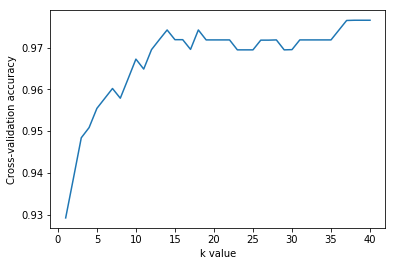

In [48]:
#Visualise best k number
plt.plot(k_range, k_scores) #plot เทียบค่า ความแม่นยำของ k แต่ละตัว
plt.xlabel ('k value')  #ใช้ค่า k แต่ละตัว เป็น label แกน x
plt.ylabel('Cross-validation accuracy') #ใช้การ croos-validation ค่า accuracy เป็น label แกน y

-จากการ plot กราฟพบว่า ค่า k ที่จะใความแม่นยำที่สุดคือ k=35

In [49]:
model = KNeighborsClassifier(n_neighbors=35) #เรียกใช้โมดูล โดยให้ค่า k=35
model.fit(X_train, Y_train) # fit โมเดล
print(model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=35, p=2,
           weights='uniform')


In [50]:
predicted = model.predict(X_test) # input ค่า สำหรับ test โมเดล
predicted

array(['business', 'sport', 'sport', 'sport', 'sport', 'sport',
       'business', 'sport', 'sport', 'technology', 'sport', 'business',
       'business', 'business', 'sport', 'business', 'sport', 'technology',
       'technology', 'sport', 'technology', 'sport', 'technology',
       'sport', 'sport', 'business', 'sport', 'business', 'business',
       'technology', 'sport', 'sport', 'technology', 'sport',
       'technology', 'business', 'business', 'sport', 'sport',
       'technology', 'technology', 'sport', 'sport', 'sport',
       'technology', 'technology', 'business', 'technology', 'sport',
       'business', 'technology', 'business', 'technology', 'technology',
       'business', 'technology', 'business', 'technology', 'business',
       'business', 'sport', 'sport', 'sport', 'technology', 'sport',
       'sport', 'business', 'sport', 'technology', 'sport', 'business',
       'technology', 'sport', 'business', 'business', 'technology',
       'business', 'sport', 'sport', 'tech

In [51]:
accuracy_knn=accuracy_score(Y_test, predicted) #หาค่าความแม่นยำของโมเดล
accuracy_knn

0.9692671394799054

### Confusion Matrix

In [52]:
conf_mtx_knn = metrics.confusion_matrix(Y_test, predicted)
conf_mtx_knn

array([[129,   4,   6],
       [  2, 167,   0],
       [  1,   0, 114]], dtype=int64)

-ค่า Confusion Matrix บอกจำนวนที่โมเดลทายถูหต้องและทายผิด โดยค่าที่ทายถูกจะอยู่ในแนวทแยง จาก มุมบนซ้าย ลง มุมล่างขวา

# Logistic Regression Model

In [53]:
lg = LogisticRegression() #เรียกใช้โมดูล
lg.fit(X_train,Y_train) # fit โมเดล

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
lg_pred=lg.predict(X_test) # input ค่า สำหรับ test โมเดล
lg_pred

array(['business', 'sport', 'sport', 'sport', 'sport', 'sport',
       'business', 'sport', 'sport', 'technology', 'sport', 'business',
       'business', 'business', 'sport', 'business', 'sport', 'technology',
       'technology', 'sport', 'technology', 'sport', 'technology',
       'sport', 'sport', 'business', 'sport', 'business', 'business',
       'technology', 'sport', 'sport', 'technology', 'sport',
       'technology', 'business', 'business', 'sport', 'sport',
       'technology', 'technology', 'sport', 'sport', 'sport',
       'technology', 'technology', 'business', 'technology', 'sport',
       'business', 'technology', 'business', 'technology', 'technology',
       'business', 'technology', 'business', 'technology', 'business',
       'business', 'sport', 'sport', 'sport', 'technology', 'sport',
       'sport', 'business', 'sport', 'technology', 'sport', 'business',
       'technology', 'sport', 'business', 'business', 'technology',
       'business', 'sport', 'sport', 'tech

In [55]:
accuracy_lg = accuracy_score(Y_test, lg_pred) #หาค่าความแม่นยำของโมเดล
accuracy_lg

0.9787234042553191

### Confusion Matrix

In [56]:
conf_mtx_lg = metrics.confusion_matrix(Y_test, lg_pred)
conf_mtx_lg

array([[135,   2,   2],
       [  3, 166,   0],
       [  2,   0, 113]], dtype=int64)

-ค่า Confusion Matrix บอกจำนวนที่โมเดลทายถูหต้องและทายผิด โดยค่าที่ทายถูกจะอยู่ในแนวทแยง จาก มุมบนซ้าย ลง มุมล่างขวา

## Naive Bayes Model

In [57]:
mnb = MultinomialNB() #เรียกใช้โมดูล
mnb.fit(X_train, Y_train) # fit โมเดล
nb_pred = mnb.predict(X_test) # input ค่า สำหรับ test โมเดล
nb_pred

array(['business', 'sport', 'sport', 'sport', 'sport', 'sport',
       'business', 'sport', 'sport', 'technology', 'sport', 'business',
       'business', 'business', 'sport', 'business', 'sport', 'technology',
       'technology', 'sport', 'technology', 'sport', 'technology',
       'sport', 'sport', 'business', 'sport', 'business', 'business',
       'technology', 'sport', 'sport', 'technology', 'sport',
       'technology', 'business', 'business', 'sport', 'sport',
       'technology', 'technology', 'sport', 'sport', 'sport',
       'technology', 'technology', 'business', 'technology', 'sport',
       'business', 'technology', 'business', 'technology', 'technology',
       'business', 'technology', 'business', 'technology', 'business',
       'business', 'sport', 'sport', 'sport', 'technology', 'sport',
       'sport', 'business', 'sport', 'technology', 'sport', 'business',
       'technology', 'sport', 'business', 'business', 'technology',
       'business', 'sport', 'sport', 'tech

In [58]:
accuracy_nb = accuracy_score(Y_test, nb_pred) #หาค่าความแม่นยำของโมเดล
accuracy_nb

0.9810874704491725

### Confusion Matrix

In [59]:
conf_mtx_nb = metrics.confusion_matrix(Y_test, nb_pred)
conf_mtx_nb

array([[136,   1,   2],
       [  3, 166,   0],
       [  2,   0, 113]], dtype=int64)

-ค่า Confusion Matrix บอกจำนวนที่โมเดลทายถูหต้องและทายผิด โดยค่าที่ทายถูกจะอยู่ในแนวทแยง จาก มุมบนซ้าย ลง มุมล่างขวา

# เปรียบเทียบ Model

### เปรียบเทียบค่าความแม่นยำ

In [60]:
print("KNN : "+str(accuracy_knn)) #ค่า accuracy ของโมเดล KNN
print("LG : "+str(accuracy_lg)) #ค่า accuracy ของโมเดล Logistic Regression
print("NB : "+str(accuracy_nb)) #ค่า accuracy ของโมเดล Naive Bayes 

KNN : 0.9692671394799054
LG : 0.9787234042553191
NB : 0.9810874704491725


In [61]:
accuracy_df = pd.DataFrame([['KNN',accuracy_knn],['LG',accuracy_lg],['NB',accuracy_nb]],columns = ['Model','Accuracy'])
accuracy_df #สร้าง Dataframe สำหรับเก็บค่า accuracy เพื่อให้ง่ายต่อการนำไป plot กราฟ

,Model,Accuracy
0,KNN,0.969267
1,LG,0.978723
2,NB,0.981087


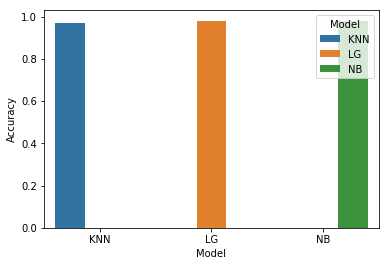

In [62]:
sns.barplot(x='Model',y='Accuracy',data=accuracy_df,hue='Model') #ทำ barplotเพื่อเปรียบเทียบแต่ละโมเดล

-จากกราฟด้านบน อาจจะไม่เห็นถึงความแตกต่างของโมเดลเพราะมีค่าความแม่นยำใกล้เคียงกัน

# สรุป

จากการทำการทดลอง ทั้ง 3 โมเดลอันได้แก่ 'KNN Classifier Model', 'Logistic Regression Model' และ 'Naive Bayes Model' โดยมีการ set ขนาดข้อมูลสำหรับ train โมเดลที่ 70% และ สำหรับ test 30% พบว่าโมเดลที่ให้ค่าควมแม่นยำมากที่สุดคือ 'Naive Bayes Model' 
ให้ค่าความแม่นยำอยู่ที่ 0.981087 หรือ 98.1087%